# Assignment 7: Neural Networks using Keras and Tensorflow

Please see the associated document for questions. If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

## Group 32: Saghar Alvandi, Sahar Abedi
### Hours spent on the task: Saghar 17h, Sahar 17h

In [38]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [39]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


## 1. Preprocessing. In the notebook, the data is downloaded from an external server and imported into the notebook environment using the mnist.load_data() function call.

### 1.1. Explain the data pre-processing highlighted in the notebook

First, the data is normalized. The pixel values of the input data are normalized to be between 0 and 1 by dividing the pixel values by 255. This is done using the `x_train.astype()` and `x_test.astype()` functions. The reason for that is in the MNIST dataset, the pixel values of the images are represented as integers ranging from 0 to 255, with 0 being black and 255 being white. Normalizing the pixel values to be between 0 and 1 makes it easier for the model to learn the underlying patterns in the data because the values are all in the same range so the model can more easily compare the relative importance of each pixel.

Then, the labels for each image in the dataset are converted into one-hot encoded vectors. This is done using the `to_categorical()` function from Keras' `utils.np_utils` module. This is done to transform the labels into a format that can be used for training a machine learning model. In the MNIST dataset, the labels are represented as integers from 0 to 9 and each integer corresponding to a specific digit. One-hot encoding transforms each label into a binary vector, where only one element is 'hot' or 'on' (has a value of 1), and the rest are 'cold' or 'off' (have a value of 0). The index of the 'hot' element corresponds to the integer label for the image. One-hot encoding allows the model to more easily learn to recognize the different digits in the dataset during training.

In [41]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4687 - accuracy: 0.8647 - val_loss: 0.2631 - val_accuracy: 0.9229
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2332 - accuracy: 0.9322 - val_loss: 0.1903 - val_accuracy: 0.9447
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1807 - accuracy: 0.9468 - val_loss: 0.1796 - val_accuracy: 0.9480
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9568 - val_loss: 0.1495 - val_accuracy: 0.9549
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9633 - val_loss: 0.1243 - val_accuracy: 0.9622
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9688 - val_loss: 0.1292 - val_accuracy: 0.9604
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1093 - val_accuracy: 0.9675
Epoch 

## 2. Network model, training, and changing hyper-parameters

### 2.1. How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

The network in the notebook has three layers: two hidden layers and one output layer.

The first and second hidden layers have 64 neurons each, and use the Rectified Linear Unit (ReLU) activation function. ReLU is a common activation function used in deep learning because it is efficient and has been shown to work well in practice. The ReLU function returns the input if it is positive, and returns 0 if it is negative, which allows the network to learn non-linear relationships between the input features and output labels.
The output layer has 10 neurons, which corresponds to the 10 possible digit classes in the MNIST dataset. The output layer uses the softmax activation function, which converts the raw output values of the network into probabilities for each class. The softmax function makes sure that the probabilities for all classes sum up to 1, which makes it a good choice for multi-class classification tasks.

The total number of parameters in the network is 53,770. This number can be calculated as follows:
The first layer is a Flatten layer, which does not have any trainable parameters.
The first hidden layer has 64 neurons, and each of them is connected to the 784 input neurons. This gives a total of (784 * 64) + 64 = 50,240 trainable parameters.
The second hidden layer also has 64 neurons, and each of them is connected to the 64 neurons in the previous layer. This gives a total of (64 * 64) + 64 = 4,160 trainable parameters.
The output layer has 10 neurons, and each of them is connected to the 64 neurons in the previous layer. This gives a total of (64 * 10) + 10 = 650 trainable parameters.

The input layer has dimensions of 28 x 28 pixels, which corresponds to the dimensions of the MNIST images. The output layer has dimensions of 10, which corresponds to the number of possible digit classes in the MNIST dataset.


### 2.2. What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The categorical cross-entropy loss function is used to train the network in the notebook. The mathematical expression for this loss function is:

$-\sum_{i=1}^{C}y_i\log(p_i)$

where $C$ is the number of classes, $y_i$ is the true label of the $i$-th class (it takes on a value of 0 or 1 depending on whether the instance belongs to the $i$-th class or not), and $p_i$ is the predicted probability of the $i$-th class.

This loss function is usually used for multi-class classification problems, like the MNIST dataset used in this assignment. It punishes the model for making incorrect predictions by assigning a higher loss value when the predicted probabilities are far from the true labels. It is appropriate for this problem because we want to minimize the difference between the predicted probabilities and the true labels to accurately classify images of handwritten digits.

### 2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9807 - val_loss: 0.0946 - val_accuracy: 0.9702
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9817 - val_loss: 0.0957 - val_accuracy: 0.9699
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9835 - val_loss: 0.0932 - val_accuracy: 0.9704
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0883 - val_accuracy: 0.9722
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9858 - val_loss: 0.0897 - val_accuracy: 0.9718
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 0.0852 - val_accuracy: 0.9731
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0832 - val_accuracy: 0.9735
Epoch 

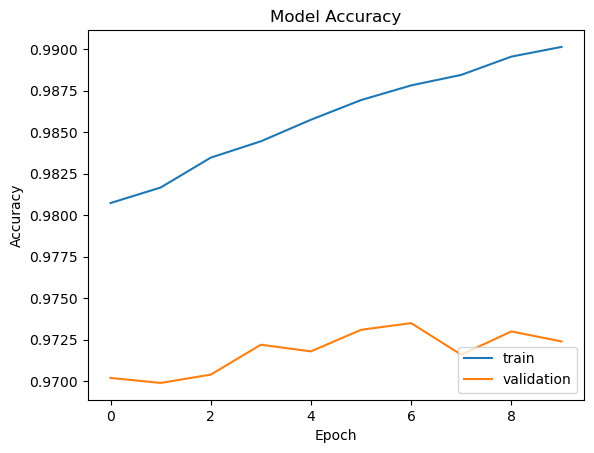

In [42]:
# Train the model for a specified number of epochs
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])      
plt.plot(history.history['val_accuracy'])   
plt.title('Model Accuracy')                  
plt.ylabel('Accuracy')                       
plt.xlabel('Epoch')                          
plt.legend(['train', 'validation'], loc='lower right')  
plt.show()                                


### 2.4. Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

Epoch 1/40
469/469 [==============================] - 5s 9ms/step - loss: 1.3219 - accuracy: 0.8892 - val_loss: 1.0903 - val_accuracy: 0.9297
Epoch 2/40
469/469 [==============================] - 4s 9ms/step - loss: 0.9794 - accuracy: 0.9427 - val_loss: 0.9113 - val_accuracy: 0.9403
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.8126 - accuracy: 0.9575 - val_loss: 0.7403 - val_accuracy: 0.9614
Epoch 4/40
469/469 [==============================] - 4s 9ms/step - loss: 0.6856 - accuracy: 0.9653 - val_loss: 0.6416 - val_accuracy: 0.9646
Epoch 5/40
469/469 [==============================] - 4s 9ms/step - loss: 0.5848 - accuracy: 0.9707 - val_loss: 0.5469 - val_accuracy: 0.9688
Epoch 6/40
469/469 [==============================] - 4s 9ms/step - loss: 0.5036 - accuracy: 0.9742 - val_loss: 0.4831 - val_accuracy: 0.9697
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.4363 - accuracy: 0.9770 - val_loss: 0.4181 - val_accuracy: 0.9728
Epoch 

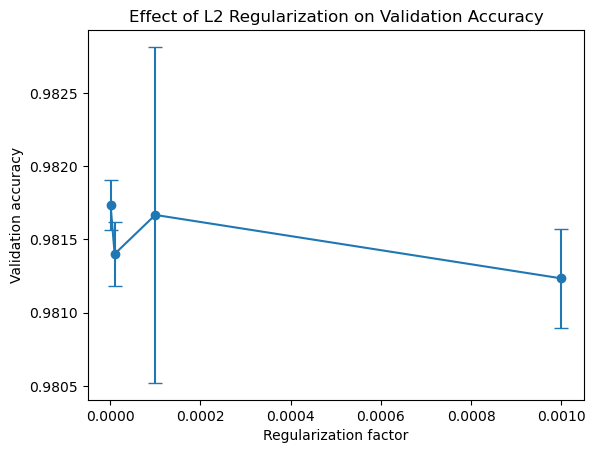

In [43]:
# Define the model architecture
model = Sequential()
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
              metrics=['accuracy'])

# Train the model for 40 epochs
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Compute the validation accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

# Define a list of regularization factors to test
reg_factors = [0.000001, 0.00001, 0.0001, 0.001]

# Define the number of replicates to train for each factor
num_replicates = 3

# Define lists to store the results
val_accs = []
std_devs = []

# Loop over the regularization factors
for reg_factor in reg_factors:
    # Define a list to store the validation accuracy for each replicate
    val_acc_replicates = []
    
    # Train multiple replicates for each factor
    for i in range(num_replicates):
        # Define the model with the current regularization factor
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)))
        model.add(Dense(300, activation='relu', kernel_regularizer=regularizers.l2(reg_factor)))
        model.add(Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=tensorflow.keras.optimizers.SGD(learning_rate=0.1),
                      metrics=['accuracy'])

        # Train the model for 40 epochs
        fit_info = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=40,
                             verbose=0,
                             validation_data=(x_test, y_test))

        # Evaluate the model on the test set and store the validation accuracy
        score = model.evaluate(x_test, y_test, verbose=0)
        val_acc_replicates.append(score[1])

    # Calculate the mean and standard deviation of the validation accuracy for the current factor
    mean_val_acc = sum(val_acc_replicates) / num_replicates
    std_dev_val_acc = np.std(val_acc_replicates)
    
    # Append the results to the lists
    val_accs.append(mean_val_acc)
    std_devs.append(std_dev_val_acc)

# Plot the validation accuracy as a function of the regularization factor with error bars showing the standard deviation
plt.errorbar(reg_factors, val_accs, yerr=std_devs, fmt='o-', capsize=5)
plt.xlabel('Regularization factor')
plt.ylabel('Validation accuracy')
plt.title('Effect of L2 Regularization on Validation Accuracy')
plt.show()


We were able to achieve a high validation accuracy of 0.9825, which is very close to Hinton's reported accuracy of 0.9847. 

There are various factors that can affect the performance of a machine learning model, such as the size and quality of the dataset, the complexity of the model architecture, and the choice of hyperparameters like the learning rate, batch size, and regularization strength. For the MNIST dataset specifically, factors like the preprocessing techniques applied to the images, the data augmentation methods used during training, and the optimization algorithm employed can also impact the model's performance. Also, there may be differences in implementation, random initialization of weights, and preprocessing of the MNIST dataset between our approach and Hinton's.

## 3. Convolutional layers
### 3.1. Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential()
# Add a convolutional layer with 64 filters, each with a 3x3 kernel and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output from the previous layer
model.add(Flatten())
# Add a fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))
# Add a dropout layer with a rate of 0.4
model.add(Dropout(0.4))
# Add a final fully connected layer with a softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer with a learning rate of 0.001, and accuracy metrics
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model on the training data and validate on the testing data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 59s 125ms/step - loss: 0.1869 - accuracy: 0.9427 - val_loss: 0.0471 - val_accuracy: 0.9845
Epoch 2/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 3/10
469/469 [==============================] - 61s 130ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0272 - val_accuracy: 0.9905
Epoch 4/10
469/469 [==============================] - 60s 128ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0225 - val_accuracy: 0.9930
Epoch 5/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0250 - val_accuracy: 0.9924
Epoch 6/10
469/469 [==============================] - 59s 127ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0221 - val_accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0217 - val_ac

The highest validation accuracy that we could achieve with this model is 99.3%. The model shows strong generalization ability bacause it achieves high accuracy on unseen data (validation set). There is a small performance gap between the training and validation accuracies, which shows that the model is not overfitting and is capable of generalizing well.

The model architecture consists of convolutional and pooling layers for feature extraction, followed by fully connected layers for classification. The dropout helps in regularization, and the use of ReLU activation functions introduces non-linearity to capture complex patterns. Below is the summary of the model's architecture and layers:

1. Convolutional Layer (64 filters, 3x3 kernel, ReLU activation):
This layer performs convolutional operations on the input images. It uses 64 filters to extract 64 different feature maps. Each filter has a 3x3 receptive field (kernel) that scans the input image. The ReLU activation function introduces non-linearity, allowing the network to learn complex patterns.

2. Max Pooling Layer (2x2 pool size):
After the first convolutional layer, a max pooling operation is applied. It reduces the spatial dimensions of the feature maps by selecting the maximum value within each 2x2 region.

3. Convolutional Layer (128 filters, 3x3 kernel, ReLU activation):
Another convolutional layer is added to extract more high-level features. This layer has 128 filters, providing a larger number of feature maps for richer representations.

4. Max Pooling Layer (2x2 pool size):
Similar to the previous max pooling layer, this layer further reduces the spatial dimensions of the feature maps.

5. Flatten Layer:
After the max pooling layer, the feature maps are flattened into a 1D vector. This transformation is necessary to connect the convolutional layers to the fully connected layers.

6. Fully Connected Layer (256 units, ReLU activation):
A fully connected layer is added to learn complex relationships between the extracted features. It has 256 units, allowing for a higher dimensional space for feature representation. The ReLU activation function introduces non-linearity and enables the model to learn non-linear relationships.

7. Dropout Layer (dropout rate of 0.4):
Dropout is a regularization technique to prevent overfitting. This layer randomly sets a fraction (0.4 in this case) of the input units to 0 during training. It helps to reduce the reliance on specific features and encourages the model to learn more robust representations.

8. Fully Connected Layer (softmax activation):
The last layer is a fully connected layer with a softmax activation function. It has num_classes units, representing the number of classes in the classification task. The softmax activation produces the final probability distribution over the classes.

### 3.2. Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?

Convolutional layers are used to analyze images and extract important features like edges, lines, and textures. They work by sliding a filter over the image to extract these features and then combining them to form higher-level representations of the image. These layers are better than fully connected layers because they share weights, which reduces the number of parameters needed to train the model.

Also, they are better at recognizing patterns regardless of their location in the image which makes them useful for tasks like image recognition. Generally, convolutional layers make image recognition models simpler, faster to train, and more accurate.
